In [1]:
############
## Imports
############


import os
from google.colab import drive
drive.mount('/content/drive')
source_path = "/content/drive/MyDrive/embodied_counting/src/"

# Import: imports
directory_path = source_path

file_name = "imports.py"
PATH = directory_path + file_name
%run -i $PATH

# Import: environment
directory_path = source_path + "environment/"

file_name = "minimal_count_environment.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "counting_tasks.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "solving_algorithms.py"
PATH = directory_path + file_name
%run -i $PATH


#Import: models
directory_path = source_path + "models/"

file_name = "experimental_simplest_LangConvLSTM_with_graph.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: train_and_test
directory_path = source_path + "train_and_test/"

file_name = "train_model_original.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "test_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "demonstrate_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "env_to_pytorch_interface.py"
PATH = directory_path + file_name
%run -i $PATH


#Import: manage_results
directory_path = source_path + "manage_results/"

file_name = "run_schedules.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "save_and_plot.py"
PATH = directory_path + file_name
%run -i $PATH

CUDA_bool = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Import ...!
Libraries/Packages successfully imported...
Load Count-Environment..
Loading Automatic Solving Algorithms..?
Load Count-Environment..
Importing counting tasks...!!!
Load Count-Environment..
Loading Automatic Solving Algorithms..?
Load Count-Environment..
Importing counting tasks...!!!
Importing counting tasks...!!!
Loading Automatic Solving Algorithms..?
Load Count-Environment..
Importing counting tasks...!!!
Importing counting tasks...!!!
Loading Automatic Solving Algorithms..?
Loading model....???
Load training process....!!!
Load test process .... 
Import demonstrate-model ..
Load env-to-pytorch interface .... 
Load run, schedules ..! 
Load result managing..!


{'task': 'give_n_extended_wo_numbers', 'distributed_squares': False, 'n_squares': 12, 'IsDecimal': True, 'base': 10, 'leading_zero': False}


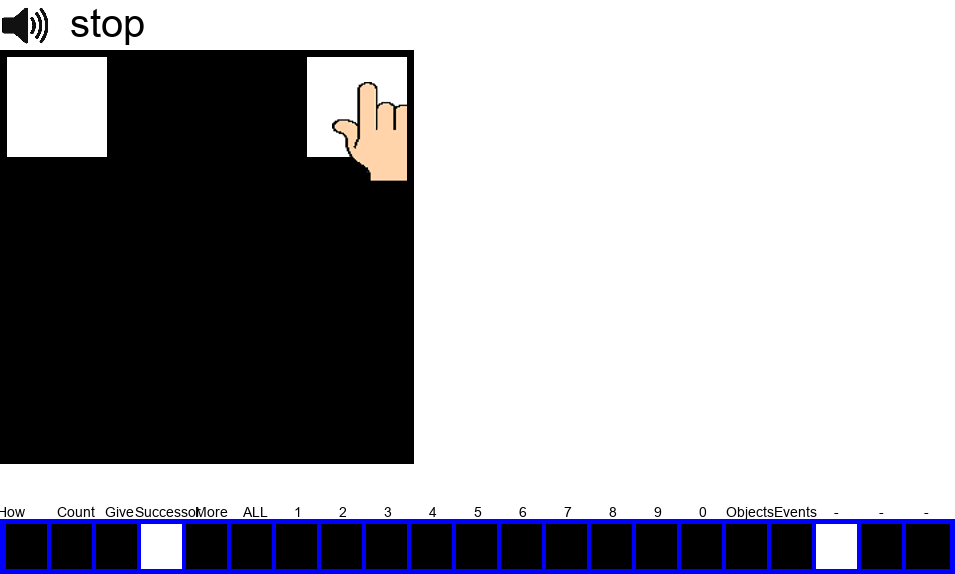

env.n_squares:  12
env.task:  <counting_tasks.GiveOneMore object at 0x7fbffb0de710>
Action:  left
Action:  pick
Action:  right
Action:  right
Action:  right
Action:  release
Action:  1
Action:  3
Action:  stop
Action:  stop
True


In [3]:
###################
## Initialize Environment
####################


env_params = {
    'task': "give_n_extended_wo_numbers",
    'distributed_squares': False,
    'n_squares': 12,
    'IsDecimal': True,
    'base': 10,
    'leading_zero': False
}



env = CountEnv(n_squares=env_params['n_squares'], rand_n_squares = True, img_size=4, params = env_params)
print(env.params)

###################
## Choose your task
####################
#env.task = "recite_N"
#env.task = "count_all_events"
#env.task = "count_all_objects"
#env.task = "give_n"
#env.task = "give_n_extended"
#env.task = "give_n_extended"
env.task = "give_one_more"
#env.task = "how_many"
#env.task = "successor"
#env.task = "more"

env.display="game" #None if it should not display the environment
env.render = True
#env.n_squares = 7
env.rand_n_squares = False
env.n_squares_wished = env_params['n_squares']
env.save_epoch = True
env.print_action_after_each_step = True
env.reset()
print("env.n_squares: ", env.n_squares)
print("env.task: ", env.EnvTask)

###################
## Runc
####################
env.solve_task()

print(env.ended)

#PATH = '/content/drive/MyDrive/Embodied_counting/Results/Gifs/' + env.task + '.gif'
#save_gif(env,PATH)

#print(env.readable_action_onehot[0])
#print(env.readable_action_onehot[1])

In [52]:
###########################
### Give one more
###########################
class GiveOneMore(CountingTask):
  def __init__(self, env):
    print("in GiveOneMore class at least")
    self.vari=0
    self.aimed_count_list_for_all_numbers  = [create_successor(env, n) for n in range(1, env.n_squares_max+20)]
    self.aimed_given_square_id_list_for_all_numbers = []

    IsDistributedSquares = env.params['distributed_squares'] if 'distributed_squares' in env.params else False 
    env.obj_source = "random" if IsDistributedSquares else "infinite_squares"

    for n_squares in range(1, env.n_squares_max+20):
      aimed_given_square_id_list = ['1']
      self.aimed_given_square_id_list_for_all_numbers.append(aimed_given_square_id_list )
classy = GiveOneMore(env)


in GiveOneMore class at least


In [ ]:
ccprint(env.params)

In [ ]:
print("Number_Action_Dict: ", env.Number_Action_Dict)
print("env.n_squares_max: ", env.n_squares_max)
print("env.base: ", env.base)
print("env.isdecimal: ", env.IsDecimal)
print("env.n_squares: ", env.n_squares)

Number_Action_Dict:  {8: '1', 9: '2', 10: '0'}
env.n_squares_max:  16
env.base:  3
env.isdecimal:  True
env.n_squares:  16


In [ ]:
print(env.EnvTask.aimed_count_list_for_all_numbers[0])

['1']


In [ ]:
print(env.solved_for_n)

3


In [3]:
#env.given_square_id_list == env.aimed_given_square_id_list and env.counted_word_list==env.aimed_count_list and env.action=="stop" and env.stopped_early == False

print("env.given_square_id_list: ", env.given_square_id_list)
print("env.aimed_given_square_id_list: ", env.aimed_given_square_id_list)
print("env.counted_word_list: ", env.counted_word_list)
print("env.aimed_count_list: ", env.aimed_count_list)
print("env.stopped_early: ", env.stopped_early)
print("env.ended: ", env.ended)
print(env.time)


env.given_square_id_list:  ['1']
env.aimed_given_square_id_list:  ['0']
env.counted_word_list:  ['3']
env.aimed_count_list:  ['3']
env.stopped_early:  False
env.ended:  True
9


In [ ]:
for i in range(12):
  print(i, ": ", int2base(i,3))

0 :  0
1 :  1
2 :  2
3 :  10
4 :  11
5 :  12
6 :  20
7 :  21
8 :  22
9 :  100
10 :  101
11 :  102


In [ ]:
def int2base(x, base):
    digs = string.digits + string.ascii_letters
    if x < 0:
        sign = -1
    elif x == 0:
        return digs[0]
    else:
        sign = 1

    x *= sign
    digits = []

    while x:
        digits.append(digs[int(x % base)])
        x = int(x / base)

    if sign < 0:
        digits.append('-')

    digits.reverse()

    return ''.join(digits)

In [ ]:
n_squares = 12

Motor_Action_Dict = {
        0: "down",
        1: "up",
        2: "right",
        3: "left",
        4: "pick",
        5: "release",
        6: "touch"
  }


Verbal_Action_Dict = {
      7: "stop"
}


IsDecimal = True
base = 10

if(not IsDecimal):
  general_number_list = []
  start_number_index = len(Motor_Action_Dict)
  for a_n in range(start_number_index+1, start_number_index+n_squares + 1):
    Verbal_Action_Dict[a_n] = str(a_n-len(Motor_Action_Dict))

if(IsDecimal):
  general_number_list = []
  start_number_index = len(Motor_Action_Dict)
  for a_n in range(start_number_index+1, start_number_index+base):
    Verbal_Action_Dict[a_n] = str(a_n-len(Motor_Action_Dict))
  Verbal_Action_Dict[start_number_index+base] = '0'

Action_Dict = dict(Motor_Action_Dict)
Action_Dict.update(Verbal_Action_Dict)


print(Motor_Action_Dict)
print(Verbal_Action_Dict)
print(Action_Dict)

{0: 'down', 1: 'up', 2: 'right', 3: 'left', 4: 'pick', 5: 'release', 6: 'touch'}
{7: 'stop', 8: '1', 9: '2', 10: '3', 11: '4', 12: '5', 13: '6', 14: '7', 15: '8', 16: '9', 17: '0'}
{0: 'down', 1: 'up', 2: 'right', 3: 'left', 4: 'pick', 5: 'release', 6: 'touch', 7: 'stop', 8: '1', 9: '2', 10: '3', 11: '4', 12: '5', 13: '6', 14: '7', 15: '8', 16: '9', 17: '0'}


In [ ]:






print(int2base(16, 2))

10000


In [ ]:
##########################
## Similar start to training initialization
#############################

env = CountEnv(n_squares=14, rand_n_squares = True, img_size=4)
env.task = "give_n_extended"
#env.task = "give_n_extended_wo_numbers"
#env.task = "how_many"
#env.task = "successor"
#env.task = "more"


env.rand_n_squares = True
env.n_squares = 14

# env.rand_n_squares = False
# env.n_squares_wished = 14

env.save_epoch = True
env.reset()
batch_size = 8
###################
## Runc
####################
#env.solve_task()
data_set = create_data_set(env, 10)
env_img_list, env_action_list, ind_list, episode_length_list, env_task_list = get_batch_from_data_set(data_set, batch_size)
print(episode_length_list)
print(env.max_time)

env.max_time directly:  82
env.max_time directly:  91
env.max_time directly:  118
env.max_time directly:  136
env.max_time directly:  100
env.max_time directly:  55
env.max_time directly:  136
env.max_time directly:  136
env.max_time directly:  28
env.max_time directly:  55
env.max_time directly:  73
[54, 142, 142, 143, 91, 54, 123, 102]
73


In [ ]:
print(episode_length_list)

[13, 12, 10, 10, 14, 14, 11, 10]


In [ ]:
for i in range(20):
  print("t: ", i)
  print(env_task_list[i])
  print("--------")

In [ ]:
print(len(env_task_list))
print(env_task_list[0].shape)
print(env_task_list[1].shape)
print(env_task_list[-1].shape)

print(len(env_img_list))
print(env_img_list[0].shape)
print(env_img_list[1].shape)

print(len(env_action_list))
print(env_action_list[0].shape)
print(env_action_list[1].shape)

15
torch.Size([8, 21])
torch.Size([8, 21])
torch.Size([1, 21])
15
torch.Size([8, 2, 4, 4])
torch.Size([8, 2, 4, 4])
15
torch.Size([8, 20])
torch.Size([8, 20])


In [ ]:
batch_ex = 0
batch_ex_vector_for_each_timestep = [env_task_list[t][batch_ex].numpy().astype(int) for t in range(episode_length_list[batch_ex])]
print(env.task_node_names)
[print(tasky) for tasky in batch_ex_vector_for_each_timestep]

['How \n many', 'Count', 'Give', 'Successor', 'More', 'ALL', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'Objects', 'Events', '-', '-', '-']
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
batch_ex_actions_for_each_timestep = [env_action_list[t][batch_ex].numpy().astype(int) for t in range(episode_length_list[batch_ex])]
print("env_action_list for batch-example: ", batch_ex)
print(env.a_strings)
[print(tasky) for tasky in batch_ex_actions_for_each_timestep]



env_action_list for batch-example:  0
[['D', 'U', 'R', 'L', 'P', 'Dr', 'T', 'A', 'E', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'S']]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
######### triple one hot to action string:
#triple_one_hot = [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
triple_one_hot = batch_ex_actions_for_each_timestep[0]

def get_a_string_from_triple_onehot(triple_one_hot):
  output_action,  output_lang = triple_one_hot[:env.n_motor_actions+1], triple_one_hot[env.n_motor_actions+1:]
  #print(output_action)
  #print(output_lang)
  a = int( np.argmax(output_action[:-1]).item() )  
  Is_a = bool( round( output_action[-1].item() ) )
  c = bool( round( output_lang[-1].item() ) )   
  word = int(np.argmax(output_lang[:-1]).item() )

  action_string = ""
  if(Is_a):
    action_string += "[a: " + Action[a]
  else:
    action_string += "a: - "
  if(c):
    action_string += ", s: " + Action[int(word+env.n_motor_actions)]
  else:
    action_string += ", s: - ]"

  return action_string

print(get_a_string_from_triple_onehot(triple_one_hot))

[a: left, s: - ]


In [ ]:
#env.triple_update("touch", False, '0', True)
#print(Action_inv[env.action])
print(env.aimed_count_list)
print(env.counted_word_list)
print(" ")
print(env.aimed_given_square_id_list)
print(env.given_square_id_list)
print(env.stopped_early)

['0', '1', '0', '2', '0', '3', '0', '4', '0', '5', '0', '6', '0', '7', '0', '8', '0', '9', '1', '0', '1', '1', '1', '2', '1', '3', '1', '4']
['0', '1', '0', '2', '0', '3', '0', '4', '0', '5', '0', '6', '0']
 
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
['1', '2', '3', '4', '5', '6', '7']
False


In [ ]:
print(env.readable_action_onehot[0])
print(env.readable_action_onehot[1])
env.triple_update("touch", False, '0', True)#
print(env.readable_action_onehot[0])
print(env.readable_action_onehot[1])

In [ ]:
print(env.task)

In [ ]:
said_words_list = []
for i in range(1,12):
  for s_i in str(i):
    said_words_list.append(s_i)

print(said_words_list)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '1', '0', '1', '1']


In [ ]:
def give_n(env):
  
    done = False
    n = env.n_squares
    given_squares_so_far = 0

    while(given_squares_so_far != n):
        given_squares_so_far += 1
        done = move_square_from_to(env, from_pos=[0,0], to_pos=[0,env.img_size-1])
        for s_i in str(given_squares_so_far):
          env.triple_update("touch", False, s_i, True)
    env.update("stop") 
    env.update("stop")